# 

In [286]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from harp_resources import process, utils
from sleap import load_and_process as lp

In [287]:
# Set global font properties
plt.rcParams['font.family'] = 'sans-serif'  # Options: 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
plt.rcParams['font.sans-serif'] = ['Arial']  # Specify a specific serif font
plt.rcParams['font.size'] = 8  # Default font size for all text elements
plt.rcParams['axes.titlesize'] = 8  # Font size for axes titles
plt.rcParams['axes.labelsize'] = 8  # Font size for axes labels
plt.rcParams['xtick.labelsize'] = 8  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 8  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 8  # Font size for legend text

In [288]:
# Open the HDF5 file
file = h5py.File('/Users/nora/Documents/resampled_streams_2024-09-18T13-02-51.h5', 'r')
file_2 = h5py.File('/Users/nora/Documents/resampled_streams_2024-09-18T13-17-40.h5', 'r')

# List all groups/datasets in the file
print("Keys in the file: ", list(file.keys()))
print("Keys in the file: ", list(file_2.keys()))

# Access a specific dataset/group by key_ROTATION
harp_time = file['HARP_timestamps']
encoder_raw = file['H2']['Encoder(38)']
optic_tracking = file['H1']['OpticalTrackingRead0Y(46)']
sleap_X = file['SleapVideoData2']['Ellipse.Center.X']
sleap_Y = file['SleapVideoData2']['Ellipse.Center.Y']
sleap_dia = file['SleapVideoData2']['Ellipse.Diameter']

# Access a specific dataset/group by key_LINEAR
harp_time_run = file_2['HARP_timestamps']
optic_tracking_run = file_2['H1']['OpticalTrackingRead0X(46)']
sleap_X_run = file_2['SleapVideoData2']['Ellipse.Center.X']
sleap_Y_run = file_2['SleapVideoData2']['Ellipse.Center.Y']
sleap_dia_run = file_2['SleapVideoData2']['Ellipse.Diameter']

# #Read the data from the dataset_ROTATION
encoder = encoder_raw[:]
time = harp_time[:]
optic_flow_Y = optic_tracking[:]
horizontal_eye = sleap_X[:]
vertical_eye = sleap_Y[:]
pupil_diameter = sleap_dia[:]

#Read the data from the dataset_LINEAR
time_run = harp_time_run[:]
optic_flow_X = optic_tracking_run[:]
horizontal_eye_run = sleap_X_run[:]
vertical_eye_run = sleap_Y_run[:]
pupil_diameter_run = sleap_dia_run[:]

Keys in the file:  ['H1', 'H2', 'HARP_timestamps', 'ONIX', 'SleapVideoData2']
Keys in the file:  ['H1', 'H2', 'HARP_timestamps', 'ONIX', 'SleapVideoData2']


In [285]:
t = (time - time[0])
t_run = (time_run - time_run[0])
print(t)
print(t_run)

[0.00000000e+00 1.00000005e-04 2.00000009e-04 ... 2.76010400e+02
 2.76010500e+02 2.76010600e+02]
[0.00000000e+00 1.00000005e-04 2.00000009e-04 ... 5.62694900e+02
 5.62695000e+02 5.62695100e+02]


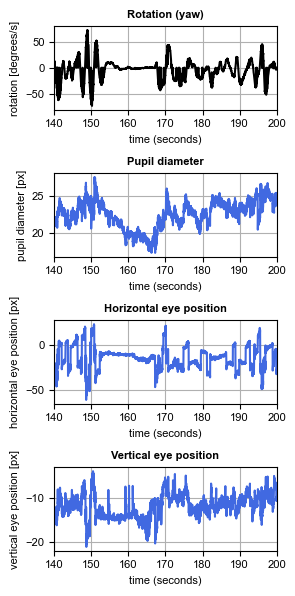

In [267]:
# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(3, 6))

# #slicing data
# start_time = 140  # Start from 140 seconds
# end_time = 200
# mask = (t >= start_time) & (t <= end_time)
# t_filtered = t[mask] 

# #or: use t-10 in the plots to plot 10 seconds in for example

# #plotting rotation
# ax[0].grid()
# ax[0].set_title('Rotation (yaw)', fontweight='bold')

# ax[0].set_xlabel('time (seconds)')
# ax[0].set_ylabel('rotation [degrees/s]')
# ax[0].plot(t_filtered, optic_flow_Y[mask], color='black', alpha=1)

# # ax_right = ax[0].twinx()  # Create a twin Axes sharing the x-axis
# # ax_right.plot(t - 10, pupil_diameter, color='royalblue', alpha=1)
# # ax_right.set_ylabel('pupil diameter [px]')  # Label for the right y-axis
# # ax_right.yaxis.set_label_coords(1.06, 0.5)  # Adjust label position if necessary
# # ax_right.yaxis.label.set_rotation(270)  # Rotate the label 270 degrees

# # ax[0].set_ylim(-80, 80)  # Adjust as needed to create more space
# # ax_right.set_ylim(10, 40)  # Adjust as needed to create more space

# ax[0].set_xlim([start_time, end_time])
# ax[0].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10

# #slicing data #plotting diameter
# ax[1].grid()
# ax[1].plot(t_filtered, pupil_diameter[mask], color='royalblue')
# ax[1].set_title('Pupil diameter', fontweight='bold')
# ax[1].set_xlim([start_time, end_time])
# ax[1].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[1].set_xlabel('time (seconds)')
# ax[1].set_ylabel('pupil diameter [px]')

# #plotting horizontal pupil
# ax[2].grid()
# ax[2].plot(t_filtered, horizontal_eye[mask], color='royalblue')
# ax[2].set_title('Horizontal eye position', fontweight='bold')
# ax[2].set_xlim([start_time, end_time])
# ax[2].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[2].set_xlabel('time (seconds)')
# ax[2].set_ylabel('horizontal eye position [px]')

# #plotting vertical pupil
# ax[3].grid()
# ax[3].plot(t_filtered, vertical_eye[mask], color='royalblue')
# ax[3].set_title('Vertical eye position', fontweight='bold')
# ax[3].set_xlim([start_time, end_time])
# ax[3].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[3].set_xlabel('time (seconds)')
# ax[3].set_ylabel('vertical eye position [px]')

# plt.tight_layout()  # Adjust layout
# plt.savefig('rotation_B3M3.png', dpi=600)  # Save as PNG with 300 DPI



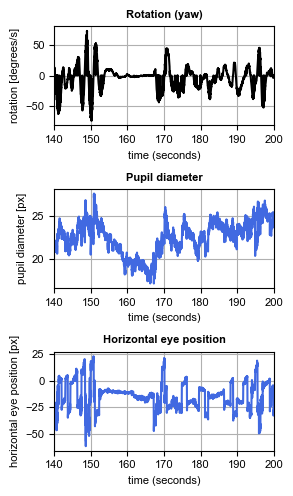

In [273]:
# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(3, 5))

# #slicing data
# start_time = 140  # Start from 140 seconds
# end_time = 200
# mask = (t >= start_time) & (t <= end_time)
# t_filtered = t[mask] 

# #or: use t-10 in the plots to plot 10 seconds in for example

# #plotting rotation
# ax[0].grid()
# ax[0].set_title('Rotation (yaw)', fontweight='bold')

# ax[0].set_xlabel('time (seconds)')
# ax[0].set_ylabel('rotation [degrees/s]')
# ax[0].plot(t_filtered, optic_flow_Y[mask], color='black', alpha=1)

# # ax_right = ax[0].twinx()  # Create a twin Axes sharing the x-axis
# # ax_right.plot(t - 10, pupil_diameter, color='royalblue', alpha=1)
# # ax_right.set_ylabel('pupil diameter [px]')  # Label for the right y-axis
# # ax_right.yaxis.set_label_coords(1.06, 0.5)  # Adjust label position if necessary
# # ax_right.yaxis.label.set_rotation(270)  # Rotate the label 270 degrees

# # ax[0].set_ylim(-80, 80)  # Adjust as needed to create more space
# # ax_right.set_ylim(10, 40)  # Adjust as needed to create more space

# ax[0].set_xlim([start_time, end_time])
# ax[0].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10

# #slicing data #plotting diameter
# ax[1].grid()
# ax[1].plot(t_filtered, pupil_diameter[mask], color='royalblue')
# ax[1].set_title('Pupil diameter', fontweight='bold')
# ax[1].set_xlim([start_time, end_time])
# ax[1].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[1].set_xlabel('time (seconds)')
# ax[1].set_ylabel('pupil diameter [px]')

# #plotting horizontal pupil
# ax[2].grid()
# ax[2].plot(t_filtered, horizontal_eye[mask], color='royalblue')
# ax[2].set_title('Horizontal eye position', fontweight='bold')
# ax[2].set_xlim([start_time, end_time])
# ax[2].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[2].set_xlabel('time (seconds)')
# ax[2].set_ylabel('horizontal eye position [px]')

# # #plotting vertical pupil
# # ax[3].grid()
# # ax[3].plot(t_filtered, vertical_eye[mask], color='royalblue')
# # ax[3].set_title('Vertical eye position', fontweight='bold')
# # ax[3].set_xlim([start_time, end_time])
# # ax[3].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# # ax[3].set_xlabel('time (seconds)')
# # ax[3].set_ylabel('vertical eye position [px]')

# plt.tight_layout()  # Adjust layout
# plt.savefig('rotation_B3M3_novert.png', dpi=600)  # Save as PNG with 300 DPI

# # 

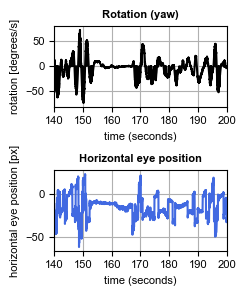

In [278]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5, 3))

#slicing data
start_time = 140  # Start from 140 seconds
end_time = 200
mask = (t >= start_time) & (t <= end_time)
t_filtered = t[mask] 

#or: use t-10 in the plots to plot 10 seconds in for example

#plotting rotation
ax[0].grid()
ax[0].set_title('Rotation (yaw)', fontweight='bold')

ax[0].set_xlabel('time (seconds)')
ax[0].set_ylabel('rotation [degrees/s]')
ax[0].plot(t_filtered, optic_flow_Y[mask], color='black', alpha=1)

# ax_right = ax[0].twinx()  # Create a twin Axes sharing the x-axis
# ax_right.plot(t - 10, pupil_diameter, color='royalblue', alpha=1)
# ax_right.set_ylabel('pupil diameter [px]')  # Label for the right y-axis
# ax_right.yaxis.set_label_coords(1.06, 0.5)  # Adjust label position if necessary
# ax_right.yaxis.label.set_rotation(270)  # Rotate the label 270 degrees

# ax[0].set_ylim(-80, 80)  # Adjust as needed to create more space
# ax_right.set_ylim(10, 40)  # Adjust as needed to create more space

ax[0].set_xlim([start_time, end_time])
ax[0].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10

# #slicing data #plotting diameter
# ax[1].grid()
# ax[1].plot(t_filtered, pupil_diameter[mask], color='royalblue')
# ax[1].set_title('Pupil diameter', fontweight='bold')
# ax[1].set_xlim([start_time, end_time])
# ax[1].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[1].set_xlabel('time (seconds)')
# ax[1].set_ylabel('pupil diameter [px]')

#plotting horizontal pupil
ax[1].grid()
ax[1].plot(t_filtered, horizontal_eye[mask], color='royalblue')
ax[1].set_title('Horizontal eye position', fontweight='bold')
ax[1].set_xlim([start_time, end_time])
ax[1].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('horizontal eye position [px]')

# #plotting vertical pupil
# ax[3].grid()
# ax[3].plot(t_filtered, vertical_eye[mask], color='royalblue')
# ax[3].set_title('Vertical eye position', fontweight='bold')
# ax[3].set_xlim([start_time, end_time])
# ax[3].set_xticks(np.arange(start_time, end_time+1,10))  # x-ticks from 0 to 10 with a step of 10
# ax[3].set_xlabel('time (seconds)')
# ax[3].set_ylabel('vertical eye position [px]')

plt.tight_layout()  # Adjust layout
plt.savefig('rotation_B3M3_novert_nodiameter.png', dpi=600)  # Save as PNG with 300 DPI

